In [57]:
fish_number =2
bn = 624
fn = 631
ROI = 'heart'

31.0
217


<IPython.core.display.Javascript object>


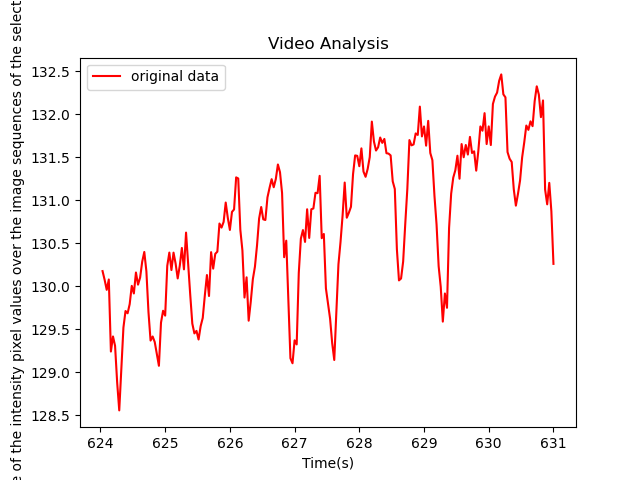

In [58]:
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib notebook
f = open("Mean-peixe4-624-631.txt", "r")
s= f.read()
f.close()
# print(s)
avg = list(s.split('\n'))
frame = []
time = []
video_dur = fn-bn
nr_frames= len(avg)-1

a = video_dur/nr_frames
print(1/a)
fps = 30 #freq de amostragem 30Hz

for n in range(1,nr_frames+1):
    frame.append(n)
    time.append(a*n + bn)
    avg[n-1] = float(avg[n-1])

avg =np.array(avg[:-1])

m = avg[:]
print(len(m))
t= time[:]
plt.plot(t, m, 'r',label = 'original data')
plt.legend(loc='best')
plt.title('Video Analysis')
plt.xlabel('Time(s)')
plt.ylabel('Average of the intensity pixel values over the image sequences of the selected ROI')
plt.show()

In [31]:
filename= "peixe{nr}-{i}-{t}-video_original_{roi}.png".format(nr=fish_number, i = bn, t = fn, roi = ROI)
plt.savefig(filename)

# Filter data

In [59]:
import scipy.signal as signal
#Design the Butterworth filter
N  = 2                 # Filter order
Wn = [0.02, 0.2]       # Cutoff frequency
B, A = signal.butter(N, Wn,'bandpass', output='ba')
smooth_data = signal.filtfilt(B,A, m)


plt.plot(t,smooth_data,'k-', label='Filtered signal')
plt.legend(loc='best')
# plt.title('Video Analysis')
plt.xlabel('Time(s)')
plt.ylabel('Pixels average intensity of the selected ROI')
plt.show()

<IPython.core.display.Javascript object>

In [4]:
filename= "peixe{nr}-{i}-{t}-video_filt_{roi}.png".format(nr=fish_number, i = bn, t = fn, roi = ROI)
plt.savefig(filename)

# Find Peaks

[ 18  37  63  83 102 133 152 173 190 209]
10


<IPython.core.display.Javascript object>


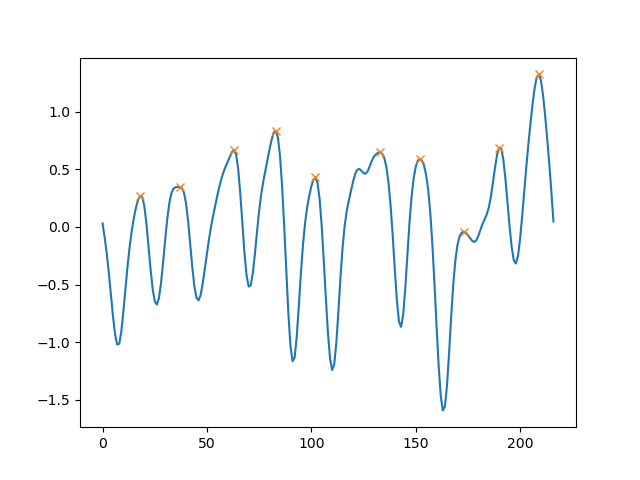

In [60]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(smooth_data, height =-1,distance = 15, threshold = 0.00001) #retorna os indices dos picos 
print(peaks)
print(len(peaks))

plt.plot(smooth_data)
plt.plot(peaks, smooth_data[peaks], "x")
plt.show()


In [61]:
heart_beat = []

for n in range(len(peaks)-1):
    delta_t = time[peaks[n+1]]-time[peaks[n]]
    if delta_t < 7:
        f_min = 60/delta_t
        heart_beat.append(f_min)
        
    else:
        print("error")
        
#hb = np.around(heart_beat, 2)
#print(len(hb))
print(heart_beat)
print(round(np.mean(heart_beat),1))

[97.89473684210351, 71.53846153845872, 93.00000000000264, 97.89473684210351, 60.0, 97.89473684212166, 88.57142857141994, 109.41176470589113, 97.89473684210351]
90.5


### Remove heart rate values outside 2 desvio padrão

In [63]:
uup = 91 + 20
down = 91 - 20
# length = len(heart_beat)-1
# for element in heart_beat:
#     if element > up:
#         heart_beat.remove(element)
#     if element < down:
#         heart_beat.remove(element)
# print(len(heart_beat))
# print(heart_beat)
# # print(down)
# print(round(np.mean(heart_beat),1))

h= []
for n in range(len(heart_beat)-1):
    if down < heart_beat[n] < up:
        h.append(heart_beat[n])
#     if heart_beat[n] > down:
#          h.append(heart_beat[n])    
print(h)
print(round(np.mean(h),1))

[97.89473684210351, 71.53846153845872, 93.00000000000264, 97.89473684210351, 97.89473684212166, 88.57142857141994, 109.41176470589113]
93.7


90.45562246491163
15.313902917121515
[ 71.53846154  75.32579186  79.11312217  82.90045249  86.68778281
  90.47511312  94.26244344  98.04977376 101.83710407 105.62443439
 109.41176471]
Gaussiana 1: [ 3.83759449 93.12549775  1.6185906 ]


<IPython.core.display.Javascript object>


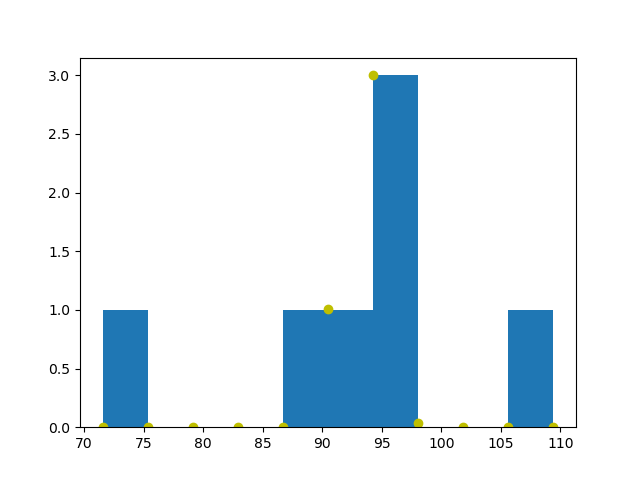

In [64]:
from scipy.stats import norm
import statistics
mean = statistics.mean(heart_beat)
sd = statistics.stdev(heart_beat)
print(mean)
print(sd)
from scipy.optimize import curve_fit
def gaussian(x, a, mean, sigma):
    return a*np.exp(-(x-mean)**2/(2*sigma**2))

hist, bin_edges = np.histogram(h, bins=10)

print(bin_edges)

best_vals, cov_vals = curve_fit(f=gaussian, xdata=bin_edges[:-1],ydata=hist[:], p0=[1, mean,sd])

print("Gaussiana 1: {}".format(best_vals))
plt.plot(bin_edges,gaussian(bin_edges, *best_vals),'yo',label='gaussian_sum')
plt.hist(h)
plt.show()

In [37]:
for m in range(len(peaks)):
    u = peaks[m]
    print(t[u])

624.6129032258065
625.2258064516129
626.0645161290323
626.7096774193549
627.3225806451613
628.0
628.3225806451613
628.9354838709677
629.6129032258065
630.1612903225806
630.7741935483871


In [19]:
Y_raw =abs(np.fft.fft(avg))
Y_smooth = abs(np.fft.fft(smooth_data))
Ta = a
Fa=1/Ta
N=len(time)
x_fft=np.linspace(0.0,1.0/(2.0*Ta),N//2) #metade da fft
f_raw = 2.0/N * abs(Y_raw[:N//2]) #normalização e só temos metade da fft, porque a fft acaba por ser um espelho 
f_smooth = 2.0/N * abs(Y_smooth[:N//2])
n=len(x_fft)

# plt.plot(x_fft[1:],f_raw[1:], 'r', label = 'Raw data FFT')
plt.plot(x_fft[2:],f_smooth[2:],'b', label = 'Filtered data FFT')
plt.legend(loc='best')
plt.xlabel('Freq (Hz)')
plt.show()

In [55]:
filename= "peixe{nr}-{i}-{t}-gauss_{roi}.png".format(nr=fish_number, i = bn, t = fn, roi = ROI)
plt.savefig(filename)

## Gaussian Fit

In [53]:
#Gaussian function
def gaussian(x, a, mean, sigma):
    return a*np.exp(-(x-mean)**2/(2*sigma**2))

def gaussian_sum2(x, a, mean, sigma, a1, mean1, sigma1):
    return (a*np.exp(-(x-mean)**2/(2*sigma**2))) + (a1*np.exp(-(x-mean1)**2/(2*sigma1**2)))

def gaussian_sum3(x, a, mean, sigma, a1, mean1, sigma1, a2, mean2, sigma2):
    return (a*np.exp(-(x-mean)**2/(2*sigma**2))) + (a1*np.exp(-(x-mean1)**2/(2*sigma1**2))) + (a2*np.exp(-(x-mean2)**2/(2*sigma2**2)))

def gaussian_sum4(x, a, mean, sigma, a1, mean1, sigma1, a2, mean2, sigma2, a3, mean3, sigma3):
    return (a*np.exp(-(x-mean)**2/(2*sigma**2))) + (a1*np.exp(-(x-mean1)**2/(2*sigma1**2))) + (a2*np.exp(-(x-mean2)**2/(2*sigma2**2))) + (a3*np.exp(-(x-mean3)**2/(2*sigma3**2)))

#mean=sum(x_fft*f)/n
#sigma=sum(f*(x_fft-mean)**2)/n

In [54]:
from scipy import fftpack
from scipy.optimize import curve_fit
best_vals, cov_vals = curve_fit(f=gaussian, xdata=x_fft[10:], ydata = f_smooth[10:], p0=[0.1,0.5 ,1]) #best_vals = melhores valores para a, mean e sigma
print(best_vals)
      
      
y_fft1 = gaussian(x_fft,best_vals[0],best_vals[1],best_vals[2])
print("Gaussiana 1: {}".format(best_vals[1]))
# y_fft2 = gaussian(x_fft,best_vals[3],best_vals[4],best_vals[5])
# print("Gaussiana 2: {}".format(best_vals[4]))
# y_fft3 = gaussian(x_fft,best_vals[6],best_vals[7],best_vals[8])
# print("Gaussiana 3: {}".format(best_vals[7]))

# plt.plot(x_fft[2:],f_smooth[2:],'b+:',label='original smooth fft')
plt.plot(x_fft,gaussian(x_fft, *best_vals),'yo',label='gaussian_sum')
plt.legend(loc='best')
plt.xlabel('Freq (Hz)')
plt.show()

[0.16631847 1.08152096 0.86880532]
Gaussiana 1: 1.0815209623831026


# Welch

<IPython.core.display.Javascript object>


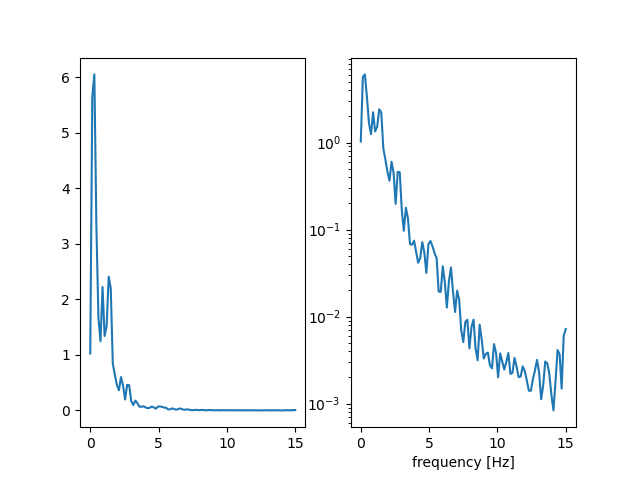

In [56]:
f1, Pxx_den = signal.welch(avg[:],fps, nperseg=200, noverlap = 50)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(f1, Pxx_den)
ax2.semilogy(f1, Pxx_den)
plt.xlabel('frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [40]:
filename= "peixe{nr}-{i}-{t}-welch_{roi}.png".format(nr=fish_number, i = bn, t = fn, roi = ROI)
plt.savefig(filename)